# Geojson Playground

This notebook imports a geojson file with geopandas and allows to play around with the data. More information in the [introduction](https://geopandas.org/en/stable/getting_started/introduction.html) or [documentation](https://geopandas.org/en/stable/docs/user_guide.html)

In [47]:
import geopandas as gpd

# Resources Paths
paths = {"era5_eu_2013": "../resources/europe-2013-era5.nc",
         "era5_tutorial": "../resources/europe-2013-era5-tutorial.nc",
         "offshore_shape": "../resources/regions_offshore_elec_s_37.geojson",
         "onshore_shape": "../resources/regions_onshore_elec_s_37.geojson",
         "capfacs": "../resources/capfacs_37.csv"}

In [48]:
gdf_onshore = gpd.read_file(paths["onshore_shape"])
# gdf_onshore = gpd.read_file("../data/regions_onshore.geojson")
# gdf_onshore.iloc[0]["name"]
gdf_onshore.iloc[7]["name"]

'DE0 0'

In [49]:
gdf_offshore = gpd.read_file(paths["offshore_shape"])
# gdf_offshore = gpd.read_file("../data/regions_offshore.geojson")
gdf_offshore

,name,geometry
0,AL0 0,"POLYGON ((19.98542 39.69475, 20.01003 39.69120..."
1,BE0 0,"POLYGON ((3.25367 51.34858, 3.10403 51.31485, ..."
2,BG0 0,"POLYGON ((29.34583 42.24111, 28.32389 41.99778..."
3,DE0 0,"MULTIPOLYGON (((14.22389 53.70083, 13.95916 53..."
4,DK0 0,"POLYGON ((9.99277 55.70499, 10.04583 55.75027,..."
5,DK4 0,"MULTIPOLYGON (((12.93400 54.83381, 12.74997 54..."
6,EE6 0,"POLYGON ((23.72555 58.74471, 23.53527 58.74180..."
7,ES0 0,"MULTIPOLYGON (((-5.36028 35.91625, -5.39555 35..."
8,ES2 0,"POLYGON ((1.87083 37.64028, 1.73314 37.62605, ..."
9,FI4 0,"MULTIPOLYGON (((23.43159 59.95382, 23.56135 59..."


To measure the area of each polygon (or MultiPolygon in this specific case), access the 'GeoDataFrame.area' attribute, which returns a pandas.Series. Note that 'GeoDataFrame.area' is just 'GeoSeries.area' applied to the active geometry column.

In [50]:
gdf_onshore["area"] = gdf_onshore.area
gdf_onshore["area"]

C:\Users\Thomas\AppData\Local\Temp/ipykernel_9440/3325893521.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_onshore["area"] = gdf_onshore.area


0      3.035618
1      9.538171
2      5.832809
3      3.723828
4     12.406771
5      4.982808
6      9.820071
7     45.725528
8      4.570123
9      1.079792
10     7.040807
11    52.458966
12     0.388623
13    70.282824
14    63.491789
15    30.706327
16     2.038767
17    12.394470
18     5.894836
19    11.056930
20     9.302911
21    31.064470
22     2.888065
23     9.169161
24     0.391781
25     9.504501
26     1.506044
27     2.741924
28     4.805887
29    49.529458
30    41.147309
31     9.234535
32    27.385253
33     9.929077
34    78.321513
35     2.875826
36     5.926830
Name: area, dtype: float64

In [51]:
gdf_onshore.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

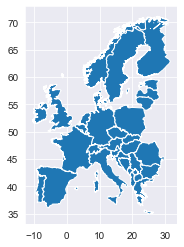

In [52]:
gdf_onshore.plot()

GeoPandas can also plot maps, so we can check how the geometries appear in space. To plot the active geometry, call 'GeoDataFrame.plot()'. To color code by another column, pass in that column as the first argument. In the example below, we plot the active geometry column and color code by the "area" column. We also want to show a legend (legend=True).

<AxesSubplot:>

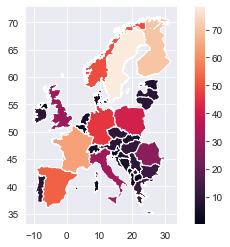

In [53]:
gdf_onshore.plot("area", legend=True)

In [54]:
gdf_onshore.explore("area", legend= False)

<AxesSubplot:>

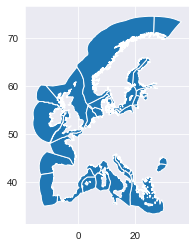

In [55]:
gdf_offshore.plot()

In [56]:
gdf_onshore["boundary"] = gdf_onshore.boundary
gdf_onshore["boundary"]

0     LINESTRING (20.32207 39.91318, 20.39703 39.818...
1     LINESTRING (14.94402 46.83544, 15.00447 46.636...
2     LINESTRING (17.62996 45.15735, 17.68474 45.163...
3     LINESTRING (5.71028 49.53109, 5.67555 49.53781...
4     LINESTRING (24.00074 41.46414, 23.94989 41.437...
5     MULTILINESTRING ((6.85093 46.04965, 6.84855 46...
6     LINESTRING (16.91052 48.63078, 16.89667 48.696...
7     MULTILINESTRING ((8.45827 47.63988, 8.51493 47...
8     MULTILINESTRING ((9.61036 54.90323, 9.62993 54...
9     LINESTRING (11.71762 55.92084, 11.66310 55.907...
10    MULTILINESTRING ((26.59009 57.52037, 26.54223 ...
11    LINESTRING (-4.58780 36.57382, -4.60852 36.540...
12    LINESTRING (2.93328 39.91450, 3.17945 39.96878...
13    MULTILINESTRING ((22.88819 59.81318, 22.94614 ...
14    MULTILINESTRING ((5.87534 43.06879, 5.85661 43...
15    MULTILINESTRING ((1.38445 51.15168, 1.35719 51...
16    MULTILINESTRING ((-6.04052 54.03644, -6.09545 ...
17    MULTILINESTRING ((24.18775 35.51805, 24.08

<AxesSubplot:>

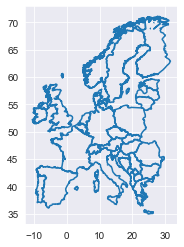

In [57]:
gdf_onshore["boundary"].plot()

In [58]:
gdf_offshore["boundary"] = gdf_offshore.boundary
gdf_offshore["boundary"]

0     LINESTRING (19.98542 39.69475, 20.01003 39.691...
1     LINESTRING (3.25367 51.34858, 3.10403 51.31485...
2     LINESTRING (29.34583 42.24111, 28.32389 41.997...
3     MULTILINESTRING ((14.22389 53.70083, 13.95916 ...
4     MULTILINESTRING ((9.99277 55.70499, 10.04583 5...
5     MULTILINESTRING ((12.93400 54.83381, 12.74997 ...
6     MULTILINESTRING ((23.72555 58.74471, 23.53527 ...
7     MULTILINESTRING ((-5.36028 35.91625, -5.39555 ...
8     MULTILINESTRING ((1.87083 37.64028, 1.73314 37...
9     MULTILINESTRING ((23.43159 59.95382, 23.56135 ...
10    MULTILINESTRING ((6.57653 43.18738, 6.64166 43...
11    MULTILINESTRING ((-5.49584 50.21695, -5.69195 ...
12    MULTILINESTRING ((-5.86458 54.16695, -5.87347 ...
13    MULTILINESTRING ((24.09000 37.77666, 24.04105 ...
14    MULTILINESTRING ((16.63778 43.44111, 16.76416 ...
15    MULTILINESTRING ((-11.11208 48.23308, -11.4632...
16    MULTILINESTRING ((14.83076 40.63152, 14.89833 ...
17    MULTILINESTRING ((7.81667 38.00167, 7.3927

<AxesSubplot:>

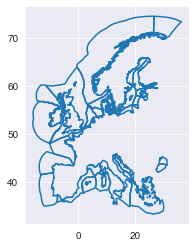

In [59]:
gdf_offshore["boundary"].plot()

C:\Users\Thomas\AppData\Local\Temp/ipykernel_9440/678997728.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_onshore["centroid"] = gdf_onshore.centroid


<AxesSubplot:>

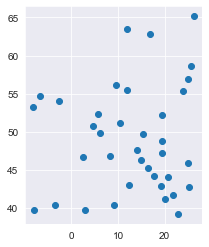

In [60]:
gdf_onshore["centroid"] = gdf_onshore.centroid
gdf_onshore["centroid"].plot()

C:\Users\Thomas\AppData\Local\Temp/ipykernel_9440/450946478.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_offshore["centroid"] = gdf_offshore.centroid


<AxesSubplot:>

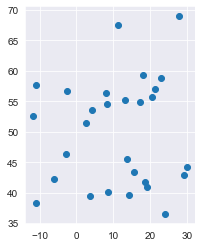

In [61]:
gdf_offshore["centroid"] = gdf_offshore.centroid
gdf_offshore["centroid"].plot()

In [62]:
first_point = gdf_onshore['centroid'].iloc[0]
gdf_onshore['distance'] = gdf_onshore['centroid'].distance(first_point)
gdf_onshore['distance']

C:\Users\Thomas\AppData\Local\Temp/ipykernel_9440/4137187825.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_onshore['distance'] = gdf_onshore['centroid'].distance(first_point)


0      0.000000
1      8.823344
2      3.789227
3     18.111455
4      5.414949
5     13.093909
6      9.809814
7     13.876754
8     18.362738
9     16.540012
10    18.370535
11    23.627835
12    17.157386
13    24.832051
14    18.430190
15    26.070007
16    29.928442
17     3.359520
18     5.412314
19     6.054803
20    30.651724
21     7.989692
22    11.049670
23    14.694276
24    16.334661
25    16.441508
26     1.832569
27     1.693143
28    18.236625
29    23.718371
30    11.001369
31    28.066644
32     6.811119
33     2.974345
34    21.893227
35     7.252090
36     7.582916
Name: distance, dtype: float64

<AxesSubplot:>

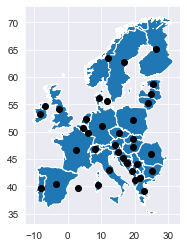

In [63]:
ax = gdf_onshore["geometry"].plot()
gdf_onshore["centroid"].plot(ax=ax, color="black")

In [64]:
gdf_onshore

,name,geometry,area,boundary,centroid,distance
0,AL0 0,"POLYGON ((20.32207 39.91318, 20.39703 39.81809...",3.035618,"LINESTRING (20.32207 39.91318, 20.39703 39.818...",POINT (20.05340 41.14346),0.000000
1,AT0 0,"POLYGON ((14.94402 46.83544, 15.00447 46.63686...",9.538171,"LINESTRING (14.94402 46.83544, 15.00447 46.636...",POINT (14.05979 47.61864),8.823344
2,BA0 0,"POLYGON ((17.62996 45.15735, 17.68474 45.16396...",5.832809,"LINESTRING (17.62996 45.15735, 17.68474 45.163...",POINT (17.77465 44.17092),3.789227
3,BE0 0,"POLYGON ((5.71028 49.53109, 5.67555 49.53781, ...",3.723828,"LINESTRING (5.71028 49.53109, 5.67555 49.53781...",POINT (4.64535 50.66274),18.111455
4,BG0 0,"POLYGON ((24.00074 41.46414, 23.94989 41.43758...",12.406771,"LINESTRING (24.00074 41.46414, 23.94989 41.437...",POINT (25.21863 42.76890),5.414949
5,CH0 0,"POLYGON ((6.85093 46.04965, 6.84855 46.08504, ...",4.982808,"MULTILINESTRING ((6.85093 46.04965, 6.84855 46...",POINT (8.23767 46.78605),13.093909
6,CZ0 0,"POLYGON ((16.91052 48.63078, 16.89667 48.69698...",9.820071,"LINESTRING (16.91052 48.63078, 16.89667 48.696...",POINT (15.31332 49.73206),9.809814
7,DE0 0,"MULTIPOLYGON (((8.45827 47.63988, 8.51493 47.6...",45.725528,"MULTILINESTRING ((8.45827 47.63988, 8.51493 47...",POINT (10.38515 51.09781),13.876754
8,DK0 0,"MULTIPOLYGON (((9.61036 54.90323, 9.62993 54.9...",4.570123,"MULTILINESTRING ((9.61036 54.90323, 9.62993 54...",POINT (9.46290 56.14451),18.362738
9,DK4 0,"POLYGON ((11.71762 55.92084, 11.66310 55.90717...",1.079792,"LINESTRING (11.71762 55.92084, 11.66310 55.907...",POINT (11.87510 55.52008),16.540012


In [65]:
gdf_onshore = gdf_onshore.set_index("name")
gdf_onshore

,geometry,area,boundary,centroid,distance
name,,,,,
AL0 0,"POLYGON ((20.32207 39.91318, 20.39703 39.81809...",3.035618,"LINESTRING (20.32207 39.91318, 20.39703 39.818...",POINT (20.05340 41.14346),0.000000
AT0 0,"POLYGON ((14.94402 46.83544, 15.00447 46.63686...",9.538171,"LINESTRING (14.94402 46.83544, 15.00447 46.636...",POINT (14.05979 47.61864),8.823344
BA0 0,"POLYGON ((17.62996 45.15735, 17.68474 45.16396...",5.832809,"LINESTRING (17.62996 45.15735, 17.68474 45.163...",POINT (17.77465 44.17092),3.789227
BE0 0,"POLYGON ((5.71028 49.53109, 5.67555 49.53781, ...",3.723828,"LINESTRING (5.71028 49.53109, 5.67555 49.53781...",POINT (4.64535 50.66274),18.111455
BG0 0,"POLYGON ((24.00074 41.46414, 23.94989 41.43758...",12.406771,"LINESTRING (24.00074 41.46414, 23.94989 41.437...",POINT (25.21863 42.76890),5.414949
CH0 0,"POLYGON ((6.85093 46.04965, 6.84855 46.08504, ...",4.982808,"MULTILINESTRING ((6.85093 46.04965, 6.84855 46...",POINT (8.23767 46.78605),13.093909
CZ0 0,"POLYGON ((16.91052 48.63078, 16.89667 48.69698...",9.820071,"LINESTRING (16.91052 48.63078, 16.89667 48.696...",POINT (15.31332 49.73206),9.809814
DE0 0,"MULTIPOLYGON (((8.45827 47.63988, 8.51493 47.6...",45.725528,"MULTILINESTRING ((8.45827 47.63988, 8.51493 47...",POINT (10.38515 51.09781),13.876754
DK0 0,"MULTIPOLYGON (((9.61036 54.90323, 9.62993 54.9...",4.570123,"MULTILINESTRING ((9.61036 54.90323, 9.62993 54...",POINT (9.46290 56.14451),18.362738


In [66]:
gdf_onshore2 = gpd.read_file("resources/regions_onshore.geojson")
gdf_onshore2

,name,x,y,country,geometry
0,2332,13.509064,52.470233,DE,"POLYGON ((13.61649 52.48096, 13.71682 52.18592..."
1,3286,11.362610,48.852065,DE,"POLYGON ((10.97705 49.02400, 11.08211 49.12982..."
2,3288,11.501312,48.793295,DE,"POLYGON ((11.33577 48.59566, 11.58189 49.17652..."
3,3289,11.840515,48.869232,DE,"POLYGON ((11.64338 49.22583, 11.78505 49.16960..."
4,3290,11.778717,48.546615,DE,"POLYGON ((11.95542 48.68000, 12.00406 48.47102..."
...,...,...,...,...,...
308,5766,10.439758,53.265213,DE,"POLYGON ((10.98776 53.28976, 11.06587 53.02226..."
309,5767,10.394440,53.007347,DE,"POLYGON ((9.87118 52.91217, 10.10841 53.19053,..."
310,6886,9.327393,53.931837,DE,"MULTIPOLYGON (((9.32319 53.78452, 9.30951 53.8..."
311,6915,10.881958,53.948004,DE,"POLYGON ((11.03582 53.54938, 10.59730 54.27799..."


<AxesSubplot:>

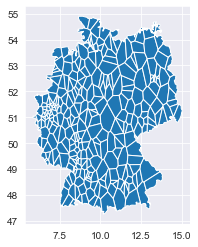

In [67]:
gdf_onshore2.plot()